In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

# 대화형 시각화 기능
%matplotlib notebook

# Ch9. 그래프와 시각화

## 9.1. matplotlib API 간략하게 살펴보기

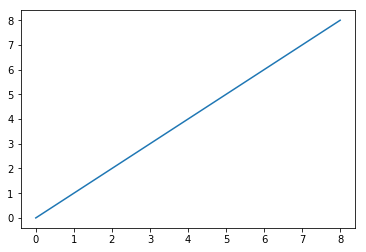

In [2]:
data = np.arange(9)
plt.plot(data)

### 9.1.1. figure 와 서브플롯  
plt에서 그래프는 figure 객체내에 존재함

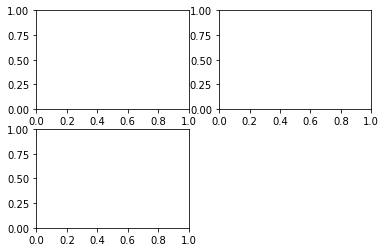

In [3]:
fig = plt.figure()
#add_subplot을 사용해서 최소 하나이상의 subplots를 생성해야함
ax1 = fig.add_subplot(2,2,1) #fig 가 2x2이고 그중 첫번쨰 서브플롯을 선택하겠다
ax2 = fig.add_subplot(2,2,2) 
ax3 = fig.add_subplot(2,2,3)

주피터 노트북을 사용할때에는 실행되는 셀마다 그래프가 리셋되므로 복잡한 그래프를 그릴떄는 단일 셀에 전부입력해야함

In [4]:
#plt.plot([1.5,3.5,-2,1.6]) #가장 최근의 fig롸 subplot에 그림, 만약 subplot이 없다면 하나생성

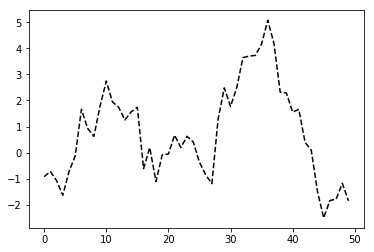

In [5]:
plt.plot(np.random.randn(50).cumsum(),'k--')

fig.add_subplot에서 AxesSubplot객체 반환되므로 각각의 인스턴스 메서드를 이용하면 서브플롯에 그림 그릴수 있음

In [6]:
_ = ax1.hist(np.random.randn(100),bins=20,color='k',alpha = 0.3)

In [7]:
ax2.scatter(np.arange(30),np.arange(30)+3 * np.random.randn(30))

특정 배치에 맞게 여러개의 서브플롯을 포함하는 fig 생성하는 경우를 위해 plt.subplots존재

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252EF442B00>,
      dtype=object)

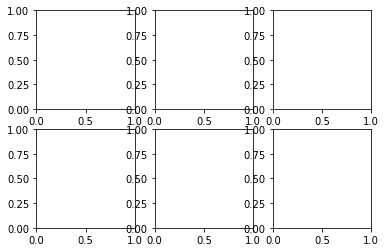

In [8]:
fig, axes = plt.subplots(2,3)
axes

**서브플롯 간의 간격 조절하기**

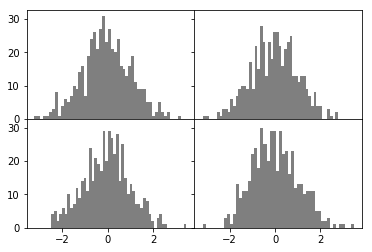

In [9]:
#subplots_adjust로 간격 안주고 생성
fig, axes = plt.subplots(2,2,sharex=True,sharey =True)
for i in range(2):
    for j in range(2):
        _ = axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha = 0.5)
plt.subplots_adjust(wspace= 0 ,hspace=0)

### 9.1.2. 색상, 마커, 선스타일

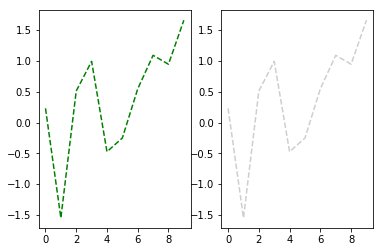

In [10]:
fig,ax = plt.subplots(1,2)
x = np.arange(10)
y = np.random.randn(10)
ax[0].plot(x,y,'g--')
ax[1].plot(x,y,linestyle = '--',color='#CECECE')#'g') #명시적 스타일, RGB 직접 입력 가능

마커 추가하기  
색상 - 마커 - 선스타일 순서

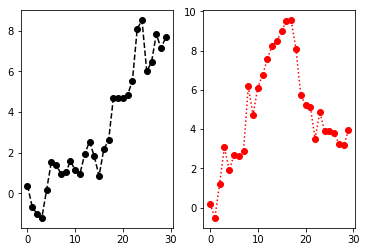

In [11]:
from numpy.random import randn as rn
fig ,ax = plt.subplots(1,2)
ax[0].plot(rn(30).cumsum(),'ko--')
ax[1].plot(rn(30).cumsum(),color='r',linestyle=':',marker='o')

drawstyle 옵션

C:\Users\sorkt\Anaconda3\lib\site-packages\matplotlib\legend.py:508: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


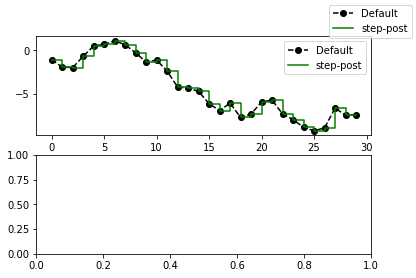

In [12]:
fig ,ax = plt.subplots(2)
data = np.random.randn(30).cumsum()
ax[0].plot(data,'ko--',label='Default')
ax[0].plot(data,'g-',label='step-post',drawstyle = 'steps-post')
ax[0].legend(loc='best')#'lower right')
fig.legend(loc='best')#'lower right')

### 9.1.3. 눈금,라벨, 범례  
그래프를 꾸미는 방법은 두가지  
1. pyplot 인터페이스를 사용해서 순차적으로 꾸미기  
2. matplotlib의 API를 사용해서 객체지향적으로 꾸미기  

pyploy 인터페이스는 xlim등 메서드로 이루어져있는데 현재 활성화된 혹은 가장 최근 Subplot에 동작함  
서브플롯 객체의 set/get 메서드로도 존재하는데 동작은 같지만 이게더 명시적임 (set_xlim)

**제목, 축, 눈금, 눈금이름 설정하기**

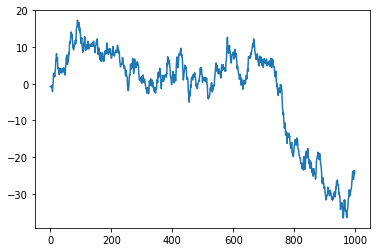

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

set_xticks, set_xticklabels

In [14]:
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(list('abcdef'),rotation = 30,fontsize='small')

In [15]:
ax.set_title('My subplot')
ax.set_xlabel('Stages')


Text(0.5, 1.0, 'My subplot')

Text(0.5, 3.1999999999999993, 'Stages')

axes 클래스는 플롯의 속성을 설정할수 있도록 set 메서드를 제공함

In [16]:
props = {
    'title':'title !!!',
    'xlabel':'X lable'
}
ax.set(**props)

[Text(0.5, 3.1999999999999993, 'X lable'), Text(0.5, 1.0, 'title !!!')]

**범례 추가하기**

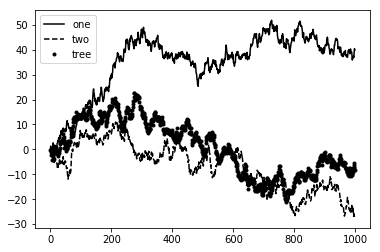

In [17]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='tree')
plt.legend()

### 9.1.4 주석과 그림 추가하기  
text,arrow,annotate 함수를 사용해 추가  
- text : 주어진 좌표에 부가적인 스타일로 글자를 그려줌

Text(1, 1, 'Hi!')

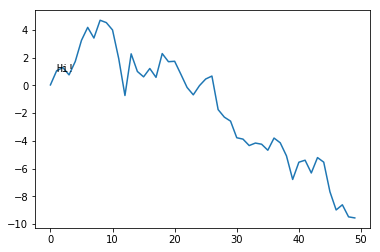

In [18]:
fig = plt.figure();ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(50).cumsum())
ax.text(1,1,'Hi!',family='monospace',fontsize=10)

Text(2007-10-11 00:00:00, 1779.41, 'Peak of Bull market')

Text(2008-03-12 00:00:00, 1533.77, 'Bear Stearns Fails')

Text(2008-09-15 00:00:00, 1417.7, 'Lehman Bankruptcy')

(732677.0, 734138.0)

(600, 1800)

Text(0.5, 1.0, 'Financial crisis')

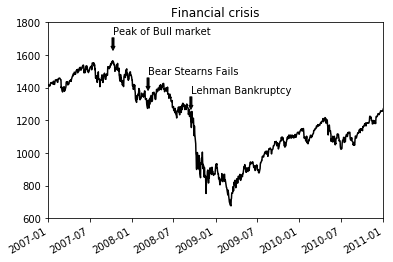

In [19]:
from datetime import datetime
fig = plt.figure();ax = fig.add_subplot(1,1,1)

data = pd.read_csv('Datas/spx.csv',index_col = 0,parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax,style='k-')


#위기상황 좌표
crisis_data = [
    (datetime(2007,10,11),'Peak of Bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]

for date,label in crisis_data:
    ax.annotate(label, xy = (date,spx.asof(date)+75),
               xytext = (date,spx.asof(date)+225),
               arrowprops = dict(facecolor='black',headwidth=4,width=2,headlength=4),
               horizontalalignment = 'left',
               verticalalignment = 'top')
#구간 확대
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Financial crisis')

**도형그리기**  
- 일반적인 도형을 표현하기 위해 patches 객체를 제공함  
- Rectangle, Circle등은 pyplot에서도 찾을수 있지만, 전체 모음은 matplotlib.pathes에 있음  
- pathes 객체인 shp를 만들고 서브플롯에 ax.add_patch(shp)를 호출

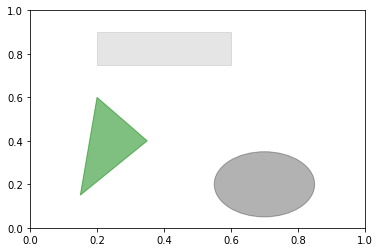

In [20]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha =0.1)
circ = plt.Circle((0.7, 0.2),0.15,color='k',alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15],[0.35,0.4],[0.2,0.6]],color = 'g',alpha = 0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)